# 決定木：Decision Tree
　Pythonのオープンソース機械学習ライブラリであるscikit-learnを用いて, 決定木を構築して予測結果を投稿する.

## Import

In [5]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

In [6]:
# ccp_alphaを使用するので0.22以上のバージョンである必要がある
sklearn.__version__

'1.7.1'

## Setting

In [9]:
# Path
input_path = "../input_data/"

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

## Read Data

In [10]:
train = pd.read_csv(input_path + "bank/train.csv", sep=",", header=0, quotechar="\"")

## Make Data
　モデル作成のためカテゴリ変数をダミー変数にして, 説明変数と目的変数に分ける.

In [11]:
train = pd.get_dummies(train, drop_first=True) # drop_first=Trueでk-1個のダミー変数となる

train_x = train.drop(columns=["y"])
train_y = train[["y"]]
print(train_y.sum())

col_name = list(train_x.columns.values)

y    3174
dtype: int64


## Make Decision Tree Model
　決定木モデルの作成. 各種パラメータは下記を参考にして下さい.  
 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [12]:
tree_model = DecisionTreeClassifier(
    criterion="gini",            # Entropy基準の場合は"entropy”
    splitter="best",             # 分割をランダムで行う場合は"random"
    random_state=17,             # 同じ分割スコアの時にランダムに選ぶseedを固定
    max_depth=10,                 # 決定木の深さの最大値
    min_samples_split=5,        # 分割する最小データ数
    min_samples_leaf=5,          # 末端ノードに該当する最小サンプル数
    ccp_alpha=0                  # 枝刈りの強さ(非負)※最初はあまりいじらなくて良い
)
tree_model = tree_model.fit(train_x, train_y)

## Visualization
　max_depthが大きいと木が大きくなり, 図示に時間がかかります.
 - 1行目：分岐の条件
   - 条件がTrueなら左に分岐, Falseなら右に分岐
 - 2行目：そのセグメントのgini or entropyの値
 - 3行目：そのセグメントの学習データでの該当件数
 - 4行目：そのセグメントの[y=0の件数, y=1の件数]

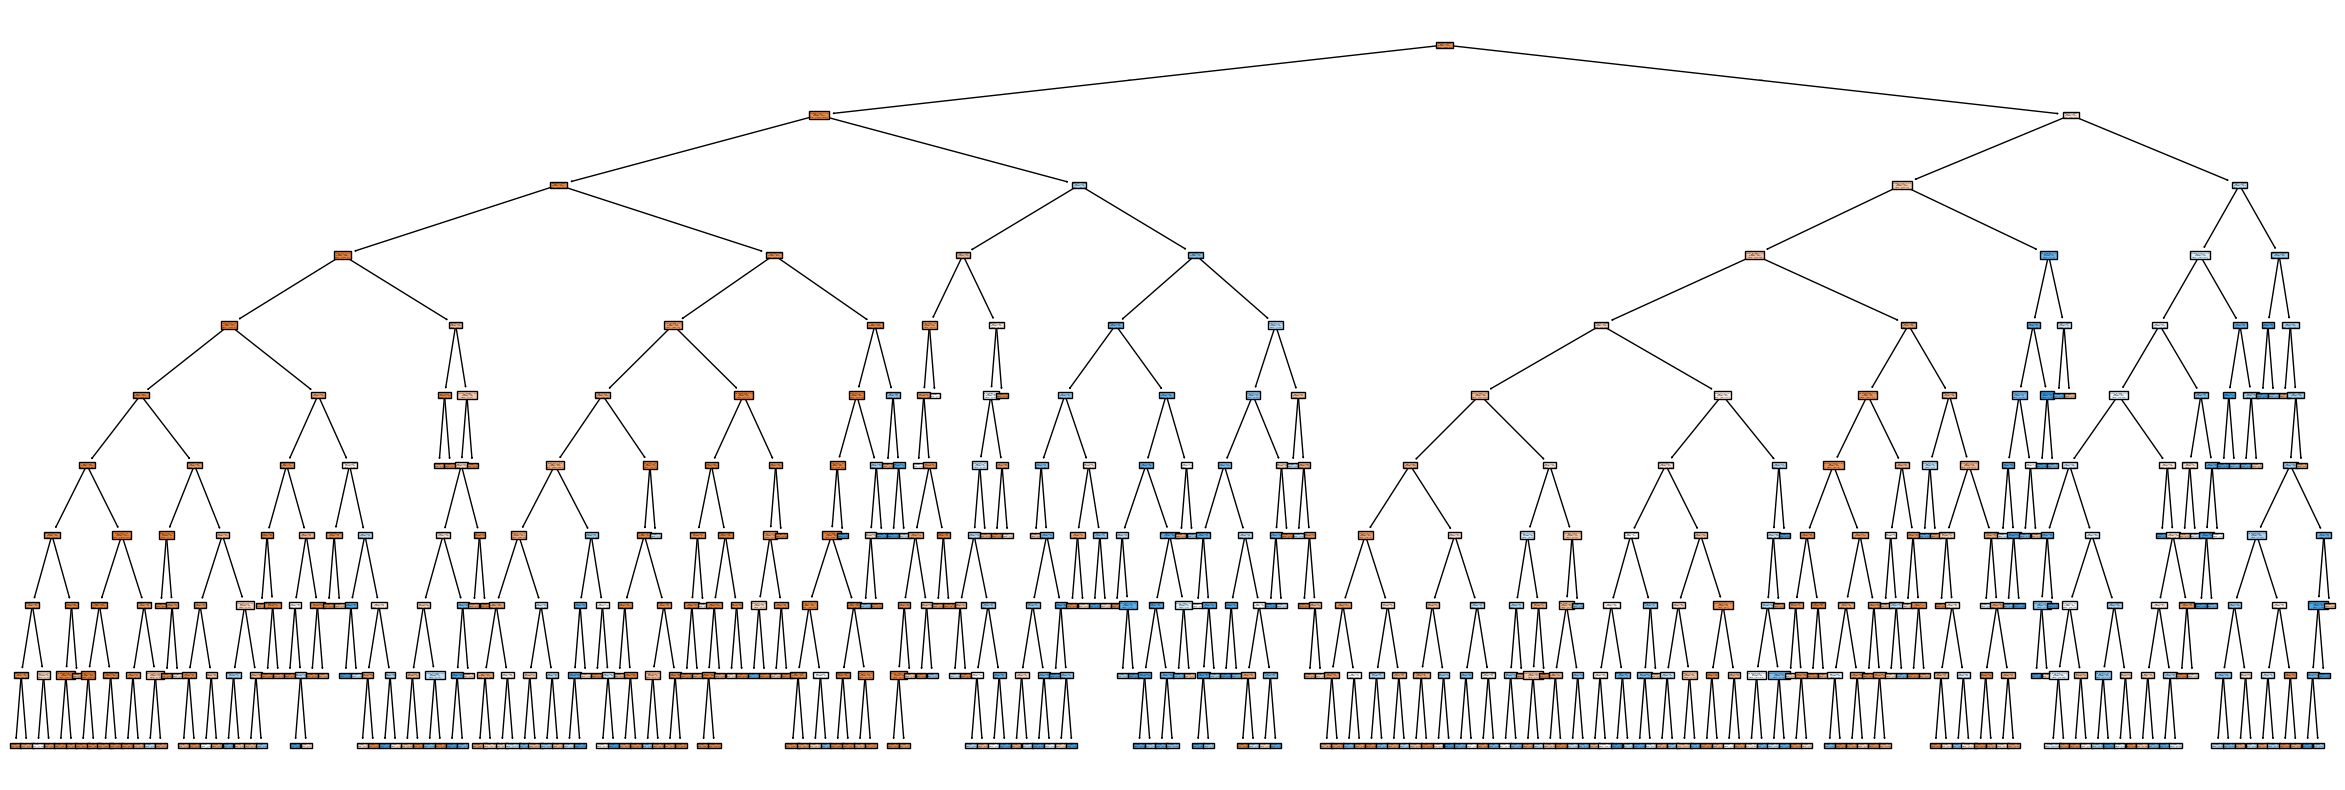

In [60]:
# scikit-learn 0.21以降から実装された
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot()
split_info = plot_tree(tree_model, feature_names=col_name, ax=ax, filled=True)

## Check AUC
　AUCの確認.

In [13]:
pred = tree_model.predict_proba(train_x)[:, 1]
roc_auc_score(train_y, pred)

0.9242650953184319

## Prediction Test
　投稿用データにモデルを適用できる形に加工.

In [62]:
test = pd.read_csv(input_path + "bank/test.csv", sep=",", header=0, quotechar="\"")
test_x = pd.get_dummies(test, drop_first=True)

# test_xをモデルに適用
pred_test = tree_model.predict_proba(test_x)[:, 1]

## Output
　投稿用ファイルの出力.

In [63]:
submit = test[["id"]].copy()
submit["pred"] = pred_test

In [65]:
# Submit File
submit.to_csv(
    path_or_buf="./submit/submit_tree_20250827_1.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=False                                        # headerの出力有無
)